In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/Savinda/netSpeed/master/log.csv'
names = ['timestamp', 'lat', 'long', 'upload_speed', 'download_speed', 'isp']
dataset = pd.read_csv(url, names=names)
dataset.head()

,timestamp,lat,long,upload_speed,download_speed,isp
0,2020-03-13 14:07:15,123.231.127.164,77.025,2.351e+07,2.649e+06,Dialog Axiata PLC
1,2020-03-13 14:17:45,123.231.127.164,74.654,1.594e+07,3.898e+06,Dialog Axiata PLC
2,2020-03-13 14:28:20,123.231.127.164,66.853,1.384e+07,2.341e+06,Hutchison Telecommunications Lanka (Pvt) Limited
3,2020-03-13 14:38:53,123.231.127.164,71.082,2.550e+07,4.134e+06,Dialog Axiata PLC
4,2020-03-13 14:49:24,123.231.127.164,70.523,2.394e+07,4.239e+06,Dialog Axiata PLC


In [31]:
# lets see how this goes when I get more data
dataset.shape
dataset.describe()

,long,upload_speed,download_speed
count,7.000,7.000e+00,7.000e+00
mean,69.633,2.116e+07,3.757e+06
std,5.377,4.992e+06,1.031e+06
min,61.264,1.384e+07,2.341e+06
25%,66.443,1.731e+07,3.138e+06
50%,70.523,2.351e+07,3.898e+06
75%,72.868,2.472e+07,4.186e+06
max,77.025,2.669e+07,5.409e+06


In [32]:
# class distribution
class_counts = dataset.groupby('isp').size()
print(class_counts)

isp
Dialog Axiata PLC                                   6
Hutchison Telecommunications Lanka (Pvt) Limited    1
dtype: int64


In [33]:
# correlation between attributes
from pandas import set_option

set_option('display.width', 100)
set_option('precision', 3)
correlations = dataset.corr(method='pearson')
print(correlations)

                 long  upload_speed  download_speed
long            1.000         0.131          -0.224
upload_speed    0.131         1.000           0.630
download_speed -0.224         0.630           1.000


In [34]:
# skew for each attribute
skew = dataset.skew()
print(skew)

long             -0.181
upload_speed     -0.494
download_speed    0.102
dtype: float64


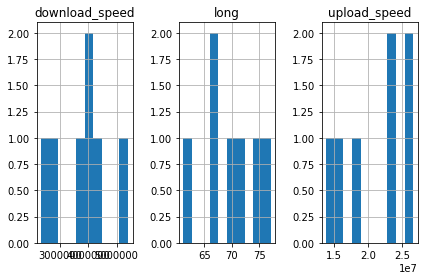

In [35]:
# univariate histogram
dataset.hist(layout=(1,3))
plt.tight_layout()
plt.show()

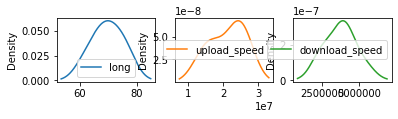

In [37]:
# univatiate density
dataset.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

long                 AxesSubplot(0.125,0.125;0.227941x0.755)
upload_speed      AxesSubplot(0.398529,0.125;0.227941x0.755)
download_speed    AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

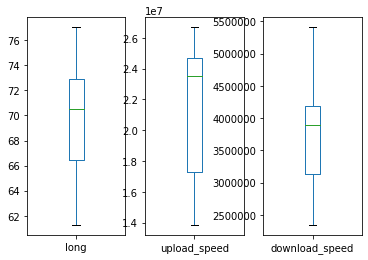

In [38]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, sharex=False, sharey=False)